In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor 
from sklearn import preprocessing

In [36]:
happyness = pd.read_csv("ACME-HappinessSurvey2020.csv")
data1 = happyness.copy()

In [37]:
data1.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [39]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


In [40]:
data1.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

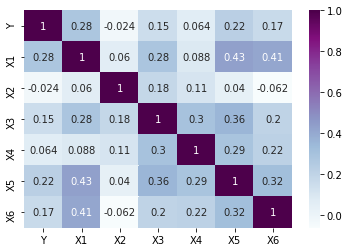

In [41]:
sns.heatmap(data1.corr(), annot=True, cmap= "BuPu");

In [42]:
from collections import Counter

In [43]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [44]:
detect_outliers(data1, data1.columns)

[47, 119]

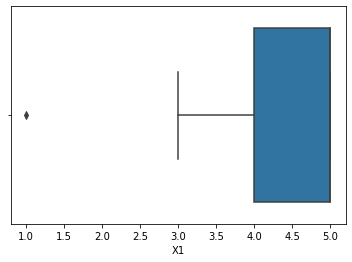

In [45]:
sns.boxplot(data1["X1"]);

In [46]:
clf= LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(data1)

data_scores=clf.negative_outlier_factor_
np.sort(data_scores)[0:10]

array([-2.35877956, -1.68405746, -1.65653639, -1.53312366, -1.52182698,
       -1.45382287, -1.42117624, -1.37682187, -1.3356129 , -1.31670736])

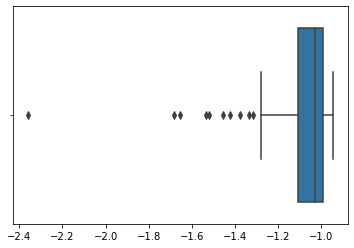

In [47]:
sns.boxplot(data_scores);

In [48]:
outlier_indexes=data1.loc[data_scores< -1.68405746]
outlier_indexes

,Y,X1,X2,X3,X4,X5,X6
119,1,5,5,1,1,5,1


In [49]:
y_data1 = data1["Y"]
y_data1.isnull().sum()
y_data1=pd.DataFrame(y_data1).drop(index=[119])
y_data1=y_data1.reset_index(drop=True)
print(y_data1.shape)
y_data1.head(2)
y_data1.isnull().sum()

(125, 1)


Y    0
dtype: int64

In [51]:
print(y_data1.shape)
data1 = data1.drop(axis= 1, columns=["Y"])

(125, 1)


In [53]:
data1=pd.DataFrame(data1).drop(index=[119])
data1=data1.reset_index(drop=True)
print(data1.shape)

(125, 6)


In [54]:
data2 = happyness.copy()

In [55]:
outlier_indexes=data2.loc[data_scores< -1.31670736]
outlier_indexes

,Y,X1,X2,X3,X4,X5,X6
6,0,3,1,2,2,1,3
9,0,4,4,4,2,5,5
34,1,4,1,3,1,1,4
47,0,1,1,1,3,1,4
56,0,5,1,1,5,3,5
63,0,5,5,5,2,5,5
71,0,4,5,5,5,1,3
94,0,3,1,3,2,1,2
116,1,3,4,4,5,1,3
119,1,5,5,1,1,5,1


In [56]:
y_data2 = data2["Y"]
y_data2.isnull().sum()
y_data2=pd.DataFrame(y_data2).drop(index=[6,9,34,47,56,63,71,94,116,119])
y_data2=y_data2.reset_index(drop=True)
print(y_data2.shape)
y_data2.head(2)

(116, 1)


,Y
0,0
1,0


In [57]:
data2 = data2.drop(index= [6,9,34,47,56,63,71,94,116,119])
data2 = data2.reset_index(drop=True)
print(data2.shape)

(116, 7)


In [58]:
data2 = data2.drop(axis= 1, columns=["Y"])
print(data2.shape)

(116, 6)


In [59]:
data2.shape

(116, 6)

In [60]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      116 non-null    int64
 1   X2      116 non-null    int64
 2   X3      116 non-null    int64
 3   X4      116 non-null    int64
 4   X5      116 non-null    int64
 5   X6      116 non-null    int64
dtypes: int64(6)
memory usage: 5.6 KB


In [68]:
data3 = happyness.copy()

In [86]:
from sklearn.metrics import mean_squared_error

In [88]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.662533
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  126
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            5
Date:                Wed, 23 Dec 2020   Pseudo R-squ.:                 0.03786
Time:                        21:16:11   Log-Likelihood:                -83.479
converged:                       True   LL-Null:                       -86.764
Covariance Type:            nonrobust   LLR p-value:                    0.2546
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2543      0.251      1.013      0.311      -0.238       0.746
X2            -0.1896      0.168     -1.127      0.260      -0.519       0.140
X3             0.0888      0.204      0.435      0.663      -0.311       0.488
X4            -0.2254      0.215     -1.047      0.295      -0.648       0.197
X5             0.2325      0.193      1.203      0.229      -0.146       0.611
X6            -0.1554      0.246     -0.632      0.527      -0.637       0.326
==============================================================================
"""

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [91]:
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X, y)
loj_model


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
loj_model.intercept_

array([-1.16531383])

In [93]:
loj_model.coef_

array([[ 0.33323844, -0.15174042,  0.09988177, -0.14293119,  0.21546681,
        -0.05641371]])

In [94]:
y_pred = loj_model.predict(X)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.6111111111111112

In [96]:
y=happyness["Y"]
X=happyness.drop("Y", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X, y)
loj_model

y_pred = loj_model.predict(X)
print("acc= ", accuracy_score(y, y_pred))

acc=  0.6111111111111112


In [97]:
y=y_data1["Y"]
X=data1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X, y)
loj_model

y_pred = loj_model.predict(X)
print("acc= ", accuracy_score(y, y_pred))

acc=  0.608


In [100]:
y=y_data2["Y"]
X=data2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X, y)
loj_model

y_pred = loj_model.predict(X)
print("acc= ", accuracy_score(y, y_pred))

acc=  0.6120689655172413


In [108]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [105]:
y=happyness["Y"]
X=happyness.drop("Y", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

svm_model

y_pred = svm_model.predict(X)
print("acc= ", accuracy_score(y, y_pred))

acc=  0.6190476190476191


In [106]:
y=y_data1["Y"]
X=data1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

svm_model

y_pred = svm_model.predict(X)
print("acc= ", accuracy_score(y, y_pred))

acc=  0.584


In [109]:
y=y_data2["Y"]
X=data2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

svm_model

y_pred = svm_model.predict(X)
print("acc= ", accuracy_score(y, y_pred))

acc=  0.6206896551724138
